# Summary

This document describes an Exploratory Data Analysis (EDA) script for the Pasadena tree dataset, focusing on tree distribution and image characteristics. It uses Python with libraries like `pandas`, `os`, and `matplotlib` to analyze and visualize the data. Below is a summary of its components and functionality:

## Key Components and Functionality

- **Libraries Used**: Imports `pandas` for data handling, `os` for file operations, and `matplotlib.pyplot`/`matplotlib.image` for visualization.
- **File Paths**: Specifies directories for CSV files, images, and the original `pasadena.csv`.
- **Data Loading**:
  - Loads the original tree data from `pasadena.csv`.
  - Concatenates all image-specific CSV files into a single DataFrame (`all_trees`), adding an `image_id` column.
- **Statistics**: Reports total trees (57,070), unique tree IDs, and trees-per-image stats (mean: 15.92, std: 9.14).
- **Quality Checks**: Confirms no missing values or duplicate IDs; identifies one `y` coordinate out of range (224).
- **Spatial Analysis**:
  - Plots histograms of `x` and `y` coordinate distributions.
  - Creates a scatter plot of tree locations for a sample image.
- **Trees per Image**: Plots a histogram of tree counts per image, showing the average (15.92).
- **Image Overlay**: Optionally overlays tree coordinates on a sample image if available.
- **Summary**: Concludes with total images processed (3,584) and trees analyzed (57,070).

## Purpose
The EDA script validates data quality, provides statistical insights, and visualizes tree distributions, preparing the dataset for advanced analysis & modeling for GreenCity project.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Directories for CSV and image files
csv_dir = "chips/pasadena_data"  # Update to your actual path
image_dir = "chips/pasadena_data"  # Update to your actual path
pasadena_csv_path = "pasadena.csv"  # Update to your actual path

In [3]:
# Load original Pasadena tree data
print("Loading original Pasadena tree data...")
pasadena_df = pd.read_csv(pasadena_csv_path)
pasadena_df.columns = pasadena_df.columns.str.lower()

Loading original Pasadena tree data...


In [4]:
# Load all image-specific CSV files into a single DataFrame
print("Loading image-specific CSV files...")
dfs = []
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv"):
        image_id = filename.replace("image_", "").replace(".csv", "")  # Extract image_id (e.g., "6504868_1884575")
        df = pd.read_csv(os.path.join(csv_dir, filename))
        df["image_id"] = image_id
        dfs.append(df)

Loading image-specific CSV files...


In [5]:
all_trees = pd.concat(dfs, ignore_index=True)
print(f"Loaded {len(dfs)} CSV files with {len(all_trees)} total trees.")

Loaded 3584 CSV files with 57070 total trees.


In [6]:
all_trees

,treeID,x,y,image_id
0,5595,208,208,6522138_1884208
1,5601,184,202,6522138_1884208
2,5602,184,168,6522138_1884208
3,5603,184,143,6522138_1884208
4,34669,35,37,6522138_1884208
...,...,...,...,...
57065,6242,98,31,6531692_1877961
57066,9246,219,118,6531692_1877961
57067,24385,188,144,6531692_1877961
57068,24386,208,143,6531692_1877961


In [7]:
pasadena_df

,objectid,tree_rec,alt_tree_id,common_name,genus,species,status_text,house_number,street_direction,street_name,street_type,street_suffix,trunk_diameter,x_coordinate,y_coordinate,classification_text,x,y
0,2,69861,13,CHINESE ELM,ULMUS,PARVIFOLIA,Active,850.0,NaN,ADELAIDE,DR,NaN,16.0,6.528584e+06,1.880864e+06,Street Tree,6.528584e+06,1.880864e+06
1,3,69862,15,SAWTOOTH ZELKOVA,ZELKOVA,SERRATA,Active,858.0,NaN,ADELAIDE,DR,NaN,16.0,6.528584e+06,1.880894e+06,Street Tree,6.528584e+06,1.880894e+06
2,4,69863,16,CHINESE ELM,ULMUS,PARVIFOLIA,Active,859.0,NaN,ADELAIDE,DR,NaN,14.0,6.528544e+06,1.880891e+06,Street Tree,6.528544e+06,1.880891e+06
3,5,69864,17,CHINESE ELM,ULMUS,PARVIFOLIA,Active,867.0,NaN,ADELAIDE,DR,NaN,24.0,6.528545e+06,1.880926e+06,Street Tree,6.528545e+06,1.880926e+06
4,6,69865,18,CHINESE ELM,ULMUS,PARVIFOLIA,Active,867.0,NaN,ADELAIDE,DR,NaN,21.0,6.528544e+06,1.880963e+06,Street Tree,6.528544e+06,1.880963e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57065,82787,162234,160761,HOLLY OAK,QUERCUS,ILEX,Active,1971.0,NaN,MONTE VISTA,ST,NaN,NaN,6.528456e+06,1.879010e+06,Street Tree,6.528456e+06,1.879010e+06
57066,82788,162235,160762,SOUTHERN LIVE OAK,QUERCUS,VIRGINIANA,Active,1555.0,NaN,MONTE VISTA,ST,NaN,NaN,6.525854e+06,1.879004e+06,Street Tree,6.525854e+06,1.879004e+06
57067,82789,162236,160763,SOUTHERN LIVE OAK,QUERCUS,VIRGINIANA,Active,1545.0,NaN,MONTE VISTA,ST,NaN,NaN,6.525829e+06,1.879004e+06,Street Tree,6.525829e+06,1.879004e+06
57068,82790,162237,160764,BRISBANE BOX,LOPHOSTEMON,CONFERTUS,Active,500.0,W,MONTANA,ST,NaN,NaN,6.512886e+06,1.888213e+06,Street Tree,6.512886e+06,1.888213e+06


In [8]:
# 1. Basic Statistics
print("\n### Basic Statistics ###")
trees_per_image = all_trees.groupby("image_id").size()
print(f"Total number of trees: {len(all_trees)}")
print(f"Number of unique tree IDs: {all_trees['treeID'].nunique()}")
print(f"Trees per image statistics:\n{trees_per_image.describe()}")


### Basic Statistics ###
Total number of trees: 57070
Number of unique tree IDs: 57070
Trees per image statistics:
count    3584.000000
mean       15.923549
std         9.142880
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        96.000000
dtype: float64


In [9]:
# Check for duplicate tree IDs
duplicate_tree_ids = all_trees[all_trees.duplicated(subset="treeID", keep=False)]
if not duplicate_tree_ids.empty:
    print(f"\nWarning: Found {len(duplicate_tree_ids)} duplicate tree IDs:\n{duplicate_tree_ids}")
else:
    print("\nNo duplicate tree IDs found.")


No duplicate tree IDs found.


In [10]:
# 2. Data Quality Checks
print("\n### Data Quality Checks ###")
missing_values = all_trees.isnull().sum()
print(f"Missing values:\n{missing_values}")


### Data Quality Checks ###
Missing values:
treeID      0
x           0
y           0
image_id    0
dtype: int64


In [11]:
# Verify coordinate ranges (assuming 224x224 pixel images)
out_of_range_x = all_trees[(all_trees["x"] < 0) | (all_trees["x"] >= 224)]
out_of_range_y = all_trees[(all_trees["y"] < 0) | (all_trees["y"] >= 224)]
print(f"X coordinates out of range (0-223): {len(out_of_range_x)}")
print(f"Y coordinates out of range (0-223): {len(out_of_range_y)}")
if not out_of_range_x.empty:
    print(f"Out-of-range X examples:\n{out_of_range_x}")
if not out_of_range_y.empty:
    print(f"Out-of-range Y examples:\n{out_of_range_y}")

X coordinates out of range (0-223): 0
Y coordinates out of range (0-223): 1
Out-of-range Y examples:
      treeID    x    y         image_id
1368   74251  182  224  6521771_1865100



### Spatial Distribution Analysis ###


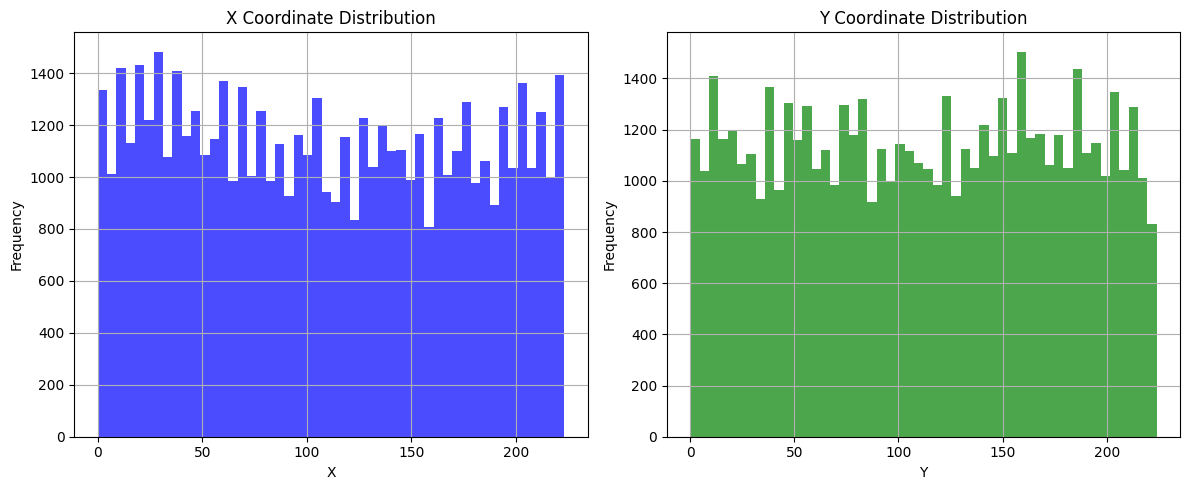

In [12]:
# 3. Spatial Distribution Analysis
print("\n### Spatial Distribution Analysis ###")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
all_trees["x"].hist(bins=50, color="blue", alpha=0.7)
plt.title("X Coordinate Distribution")
plt.xlabel("X")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
all_trees["y"].hist(bins=50, color="green", alpha=0.7)
plt.title("Y Coordinate Distribution")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

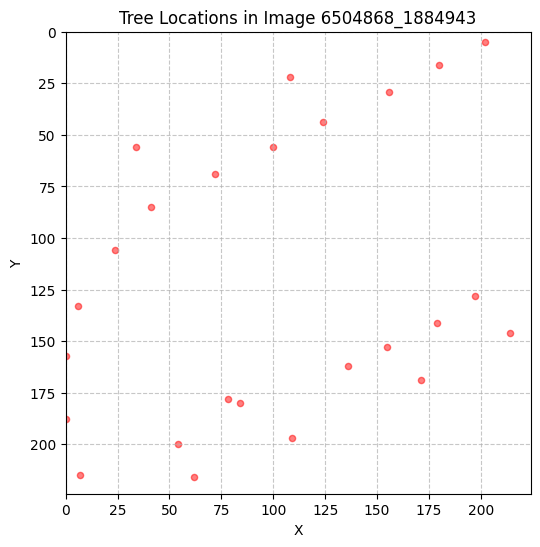

In [13]:
# Scatter plot for a sample image
sample_image_id = "6504868_1884943"  # Update as needed
sample_trees = all_trees[all_trees["image_id"] == sample_image_id]
plt.figure(figsize=(6, 6))
plt.scatter(sample_trees["x"], sample_trees["y"], s=20, c="red", alpha=0.5)
plt.title(f"Tree Locations in Image {sample_image_id}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 224)
plt.ylim(0, 224)
plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Histogram of Trees per Image ###


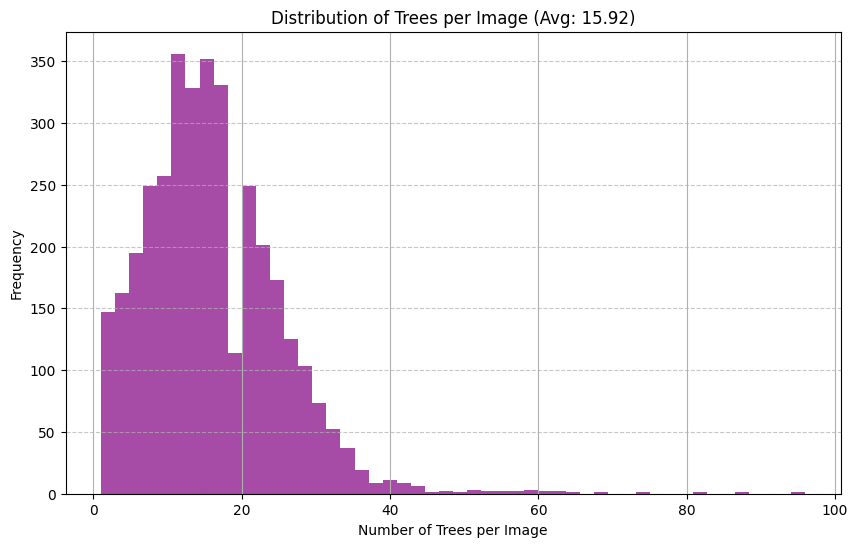

In [14]:
# 4. Histogram of Trees per Image
print("\n### Histogram of Trees per Image ###")
avg_trees = len(all_trees) / len(dfs)  # Calculate average trees per image
plt.figure(figsize=(10, 6))
trees_per_image.hist(bins=50, color="purple", alpha=0.7)
plt.title(f"Distribution of Trees per Image (Avg: {avg_trees:.2f})")
plt.xlabel("Number of Trees per Image")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Overlaying Coordinates on Sample Image ###


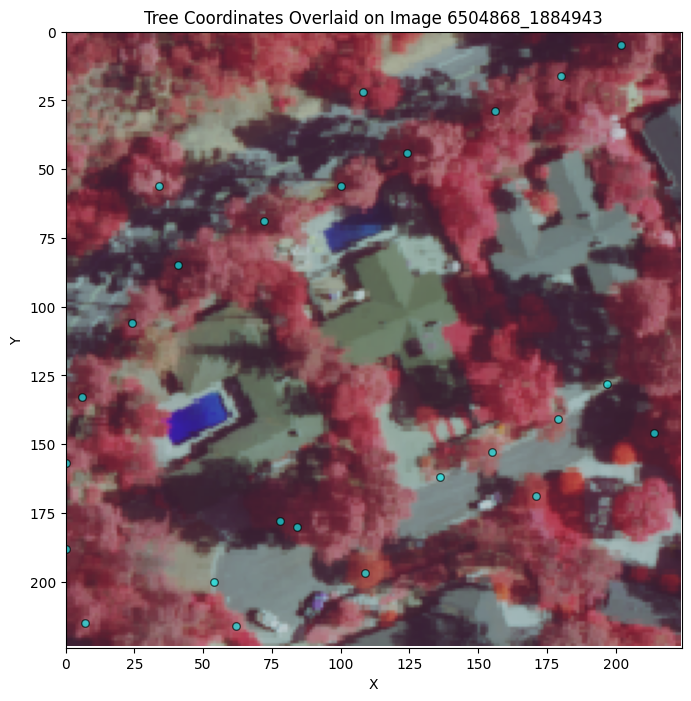

In [17]:
# 5. Optional: Overlay coordinates on a sample image
sample_image_path = os.path.join(image_dir, f"image_{sample_image_id}.png")
if os.path.exists(sample_image_path):
    print("\n### Overlaying Coordinates on Sample Image ###")
    img = mpimg.imread(sample_image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.scatter(sample_trees["x"], sample_trees["y"], s=30, c="cyan", alpha=0.6, edgecolors="black")
    plt.title(f"Tree Coordinates Overlaid on Image {sample_image_id}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 224)
    plt.ylim(0, 224)
    plt.gca().invert_yaxis()  # Match image coordinate system
    plt.show()
else:
    print(f"\nSample image {sample_image_path} not found. Skipping overlay.")

In [16]:
# 6. Summary
print("\n### Summary ###")
print(f"Total images processed: {len(dfs)}")
print(f"Actual total trees: {len(all_trees)}")
print("EDA complete. Review the plots and output for insights.")


### Summary ###
Total images processed: 3584
Actual total trees: 57070
EDA complete. Review the plots and output for insights.
